## Introduction 

files needed = None

This week we are working on

1. Bar charts
3. Exam 1 feedback

In [1]:
import pandas as pd     
import matplotlib.pyplot as plt   

%matplotlib inline      

## Bar charts
Bar charts are useful for describing relatively few observations of categorical data &mdash; meaning that one of the axes is not quantitative. [Tufte](https://www.edwardtufte.com/tufte) would complain that they have a lot of redundant ink, but they are quite popular...and Tufte is not our dictator. It's always good, however, to think about what our figures are doing for us.   

Bar charts are much better than pie charts for displaying the relative size of data. There are discussions of this all over the net (here is [one](http://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts) I like) but the anti-pie-chart argument boils down to: Pie charts are hard to read.   

1. Humans are bad at judging the relative sizes of 2D spaces. They cannot tell if one slice is 10% larger than another slice.
2. The MS-Excel style of coloring the slice different colors creates problems. Humans judge darker colors to have larger areas. 
2. To get quantitative traction, people label the slices with the data values. In this case, a table of numbers is probably a better way to share the data.

In [2]:
# PPP GDP data from the penn world tables. The units are thousands of USD. 

code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India', 'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

gdp = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
gdp

,gdppc,country
USA,53.1,United States
FRA,36.9,France
JPN,36.3,Japan
CHN,11.9,China
IND,5.4,India
BRA,15.0,Brazil
MEX,16.5,Mexico


The `ax.bar()` method ([docs](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html)) takes two pieces of data: A numerical value and a label. In our example, the numerical values are the gdp per capita measures and the labels are the country names or country codes. The simplest syntax is:

```python
ax.bar(labels, values)
```

but we can specify options like edge and face color, bar width, alpha, etc. As usual, see the documentation for more details and options.  

Let's plot gdp per capita and the country codes.

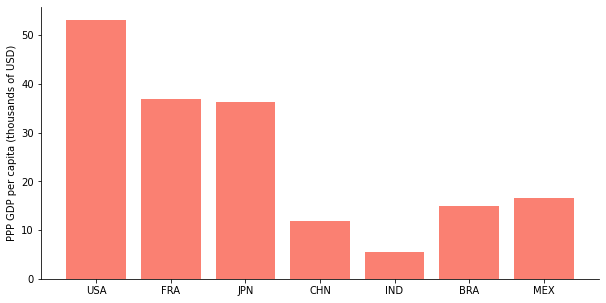

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(gdp.index, gdp['gdppc'], color='salmon', alpha=1.0)     

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('PPP GDP per capita (thousands of USD)')
# ax.set_title('Income per person (at purchasing power parity)')

plt.show()

This chart makes it easy to compare the levels of income per capita: India has about half the income of China; Brazil is about the same as Mexico,...

* I used a light color in the figure. There is a lot of ink here, and using blue or red really makes for a loud figure. Change the color to red and re-run the code above. What do you think? You could use alpha to soften a red or blue, also. [Here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) is a list of the named colors in matplotlib. Experiment!

* The x-axis data (the *labels*) are not quantitative. We could have used the country names instead of the codes and the message communicated by the figure would not have changed. 

* Since the labels are not quantitative, we are free to order the bars as we choose. We should choose something meaningful. Right now, the ordering is random. We could order alphabetically. Let's try ordering them poorest to richest.  We will use the `.sort_values()` method.


In [14]:
# Reminder: sort_values() sorts the DataFrame according to the values in a column. 
gdp.sort_values('gdppc', ascending=False)

,gdppc,country
USA,53.1,United States
FRA,36.9,France
JPN,36.3,Japan
MEX,16.5,Mexico
BRA,15.0,Brazil
CHN,11.9,China
IND,5.4,India


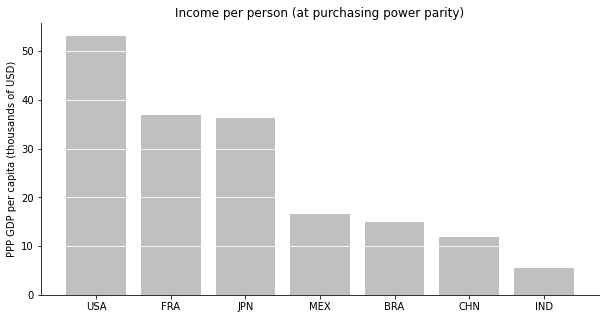

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(gdp.sort_values('gdppc', ascending=False).index,
       gdp.sort_values('gdppc', ascending=False)['gdppc'], 
       color='silver', alpha=1.0)      
ax.grid(axis='y', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Income per person (at purchasing power parity)')
ax.set_ylabel('PPP GDP per capita (thousands of USD)')

plt.show()

Notice the use of `grid()` to specify grid lines on the y axis. I made them white, so they only show up in the bars. This is an alternative to, say, black grid lines. Grid lines are only informative where they cross the bars. Grid lines in the blank spaces are just extra ink. 

Take a look at the two examples below. Which conveys the most information with the least amount of ink?

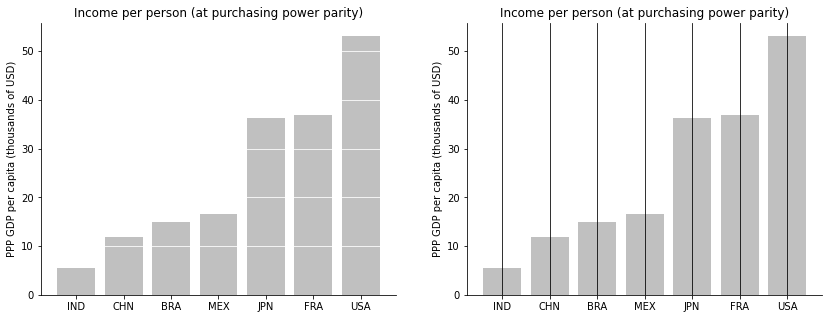

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))

for ax in axs:
    ax.bar(gdp.sort_values('gdppc').index, gdp.sort_values('gdppc')['gdppc'], 
           color='silver', alpha=1.0)         
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title('Income per person (at purchasing power parity)')
    ax.set_ylabel('PPP GDP per capita (thousands of USD)')

    
axs[0].grid(axis='y', color='white')
axs[1].grid(axis='y', color='black')

plt.show()

## Practice: Bar charts

Maybe you prefer a horizontal bar chart. Same data, same approach. We just need to swap all the y labels for x labels. 

1. Create a horizontal bar chart of the gdp data we used above. Check the documentation for `.barh()`
2. Fix up your figure labels, etc. 

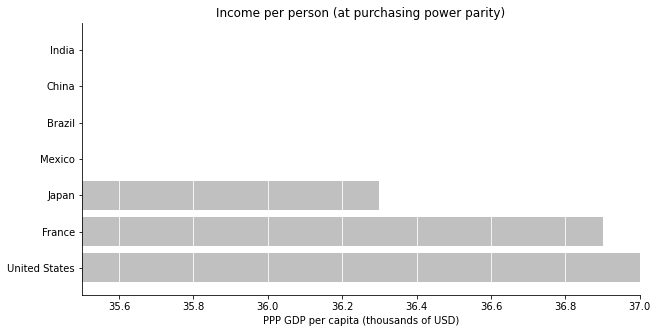

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

# horizontal bar chart

ax.barh(gdp.sort_values('gdppc', ascending=False)["country"],
       gdp.sort_values('gdppc', ascending=False)['gdppc'], 
       color='silver', alpha=1.0)      
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Income per person (at purchasing power parity)')
ax.set_xlabel('PPP GDP per capita (thousands of USD)')

ax.set_xlim(35.5,37)

plt.show()

3. Create a new horizontal bar chart where each bar is gdp per capita relative to the United States. So USA =1, MEX = 0.31, etc.  

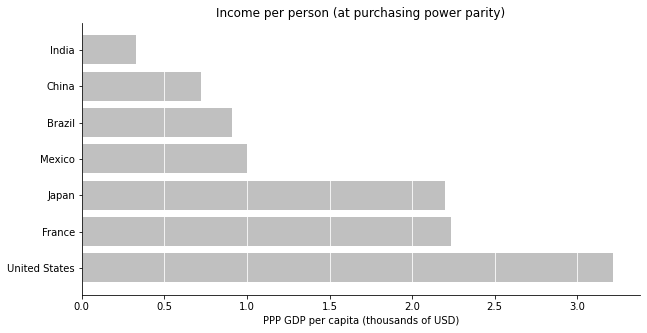

In [30]:
# Divide all country gdppc by the US gdppc

gdp["gdppc_relative"] =  gdp["gdppc"] / gdp.loc["MEX", "gdppc"]

# Now plot
fig, ax = plt.subplots(figsize=(10,5))


ax.barh(gdp.sort_values('gdppc', ascending=False)["country"],
       gdp.sort_values('gdppc', ascending=False)['gdppc_relative'], 
       color='silver', alpha=1.0)      
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Income per person (at purchasing power parity)')
ax.set_xlabel('PPP GDP per capita (thousands of USD)')



plt.show()

We have done this kind of thing before. By dividing through by U.S. gdppc, we are changing the **unit of measurement.** In our previous figures, the units were thousands of U.S. dollars. Now, the units are 'size relative to the United States'.  When we do this, we are *normalizing* the variable. This makes it even easier to see how other countries compare to the United States, which has the highest income in the group.

Note that we could have normalized by any country's gdppc. If we were doing a project about Mexico, it would make sense to normalize by Mexican gdppc so that we can see how other countries compare to Mexico.